In [2]:
import networkx as nx
import triad_utils
import numpy as np
import scipy.sparse as sp
import matplotlib.pyplot as plt
import methods

In [3]:

raw_data = "congress.edgelist"
with open(raw_data, 'r') as file:
    lines = file.readlines()

In [4]:

l = []
for line in lines:
    n1, n2 = line.strip().split(" ")[0:2]
    l.append((n1, n2))

def convert_to_regular_triads(networkx_triads):
    census = []
    census.append(networkx_triads['021D'])
    census.append(networkx_triads['021U'])
    census.append(networkx_triads['021C'])
    census.append(networkx_triads['111D'])
    census.append(networkx_triads['111U'])
    census.append(networkx_triads['201'])
    census.append(networkx_triads['030T'])
    census.append(networkx_triads['030C'])
    census.append(networkx_triads['120D'])
    census.append(networkx_triads['120U'])
    census.append(networkx_triads['120C'])
    census.append(networkx_triads['210'])
    census.append(networkx_triads['300'])
    return census


data = nx.DiGraph(l)
#print(list(data.nodes))
census = convert_to_regular_triads(nx.triadic_census(data))
print(nx.triadic_census(data))
sum = 0
for c in nx.triadic_census(data):
    print("CENSUS: ", c, " ", nx.triadic_census(data)[c])
    sum = sum + nx.triadic_census(data)[c]


{'003': 13444467, '012': 2684624, '102': 1142419, '021D': 65548, '021U': 78980, '021C': 70066, '111D': 94729, '111U': 76108, '030T': 13929, '030C': 882, '201': 40051, '120D': 8863, '120U': 6112, '120C': 6367, '210': 12549, '300': 3631}
CENSUS:  003   13444467
CENSUS:  012   2684624
CENSUS:  102   1142419
CENSUS:  021D   65548
CENSUS:  021U   78980
CENSUS:  021C   70066
CENSUS:  111D   94729
CENSUS:  111U   76108
CENSUS:  030T   13929
CENSUS:  030C   882
CENSUS:  201   40051
CENSUS:  120D   8863
CENSUS:  120U   6112
CENSUS:  120C   6367
CENSUS:  210   12549
CENSUS:  300   3631


In [9]:
census/np.sum(census)

array([0.1371828 , 0.1652941 , 0.14663834, 0.19825455, 0.1592834 ,
       0.08382114, 0.02915145, 0.0018459 , 0.01854902, 0.01279156,
       0.01332524, 0.0262633 , 0.00759918])

In [5]:
normalized_census = census/np.sum(census)


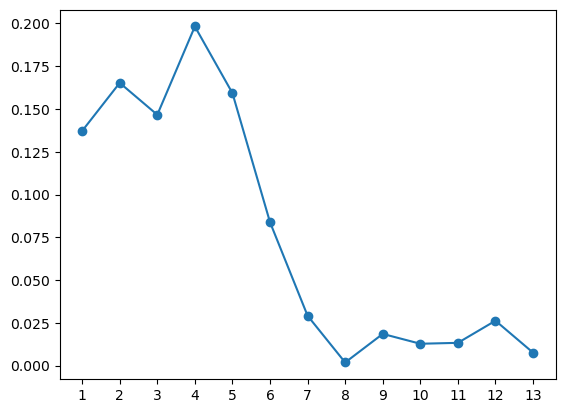

In [6]:
plt.plot(normalized_census,'-o')
plt.xticks(range(0,13),range(1,14))
plt.show()

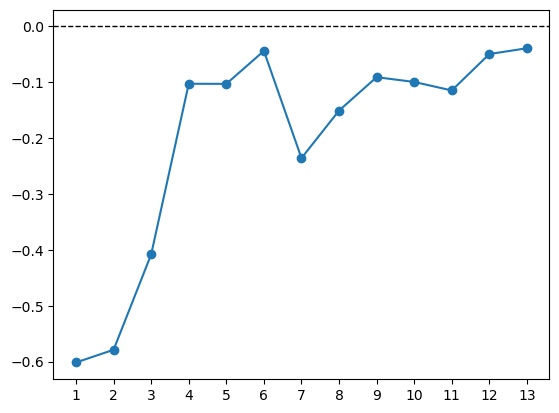

In [7]:
    
#print(methods.triad_census(list(data.nodes), list(data.edges)))data_matrix = nx.adjacency_matrix(data)
data_matrix = nx.adjacency_matrix(data)[3:][3:]
data_matrix = data_matrix.toarray()

significance_profile = triad_utils.triad_significance_profile(normalized_census, data_matrix, 100,400)
profile_plot = plt.plot(significance_profile, "o-")
plt.xticks(range(0,13),range(1,14))
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
#image = plt.savefig("image.png")
plt.show()